# 1. 필요 Library 설치

In [1]:
!pip install beautifulsoup4

In [2]:
!pip install pillow

In [3]:
!pip install wordcloud

In [4]:
!pip install matplotlib

# 2. 실행 코드

### (1) 라이브러리 불러오기

In [5]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image

import pandas as pd
import numpy as np
import random
import requests
import re

import matplotlib.pyplot as plt
from matplotlib import font_manager

### (2) 네이버 종목 토론방 긁어오기

In [6]:
def stock_discussion_room(stock_code, pages):
    
    opinion_date_total = []
    opinion_total = []
    chanti = []
    anti = []
    
    for i in range(pages) :
        
        url = 'https://finance.naver.com/item/board.nhn?code=' + stock_code + '&page=' + str(i+1)
        response = requests.get(url)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')

        opinion_date = []
        r = re.compile(r'\d{4}.\d{2}.\d{2}')
        
        for date in soup.find_all('span') : 
            match = r.search(date.text)
            
            if match != None :
                opinion_date.append(match.group())

        opinion_date = opinion_date[-20:]
        
        for value in opinion_date : 
            opinion_date_total.append(value)
        
        opinion = soup.select('.title')
        for i in range(20) :    
            opinion_total.append(opinion[i].find('a')['title'])
           
        for i, finger in enumerate(soup.find_all('strong')) :
            
            if i in np.arange(2,42, step = 2) :     
                chanti.append(finger.text)

            elif i in np.arange(3,42, step = 2) :
                anti.append(finger.text)
    
    return opinion_date_total, opinion_total, chanti, anti

# 종목코드

- 삼성전자 : 005930
- 셀트리온 : 068270
- 에이치엘비 : 028300
- 젬백스 : 082270
- 메드팩토 : 235980
- 플리토 : 300080
- 화신테크 : 086250

In [7]:
opinion_date_total, opinion_total, chanti, anti = stock_discussion_room('005930', 500)

In [8]:
df = pd.DataFrame({'날짜' : opinion_date_total, '토론제목' : opinion_total, '찬성' : chanti, '반대' : anti})

In [9]:
df.head()

,날짜,토론제목,찬성,반대
0,2020.01.02,야 우빨아,0,1
1,2020.01.02,너무,0,0
2,2020.01.02,김정은이2중대 어리버리 문어벙홍어,2,0
3,2020.01.02,발상의전환,1,2
4,2020.01.02,온통 세계가 불기둥 우리만 수년 왜그러냐 ? 주식투자자가 왜이리 블쌍한지 ?,3,0


In [10]:
df['인간지표'] = np.nan
for i in range(df.shape[0]) :
    if int(df['찬성'][i]) == int(df['반대'][i]) :
        df['인간지표'][i] = '중립'
    elif int(df['찬성'][i]) > int(df['반대'][i]) :
        df['인간지표'][i] = '찬티'
    elif int(df['찬성'][i]) < int(df['반대'][i]) :
        df['인간지표'][i] = '안티'
df

C:\Users\woong\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\woong\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,날짜,토론제목,찬성,반대,인간지표
0,2020.01.02,야 우빨아,0,1,안티
1,2020.01.02,너무,0,0,중립
2,2020.01.02,김정은이2중대 어리버리 문어벙홍어,2,0,찬티
3,2020.01.02,발상의전환,1,2,안티
4,2020.01.02,온통 세계가 불기둥 우리만 수년 왜그러냐 ? 주식투자자가 왜이리 블쌍한지 ?,3,0,찬티
5,2020.01.02,삼성전자 세계 첫 3나노 반도체 기술 개발,2,0,찬티
6,2020.01.02,삼성전자 3나노반도체 최초개발,2,0,찬티
7,2020.01.02,기래기야 엄살떠네ㅡ돈없으믄 외곽으로 나가라,1,0,찬티
8,2020.01.02,전원책이,2,2,중립
9,2020.01.02,전원책이,0,2,안티


## (4) 워드클라우드 살펴보기

In [11]:
contents = " "
for content in df['토론제목'] : 
    contents = contents + " " + content
contents


'  야 우빨아 너무 김정은이2중대 어리버리 문어벙홍어 발상의전환 온통 세계가 불기둥 우리만 수년 왜그러냐 ? 주식투자자가 왜이리 블쌍한지 ? 삼성전자 세계 첫 3나노 반도체 기술 개발 삼성전자 3나노반도체 최초개발 기래기야 엄살떠네ㅡ돈없으믄 외곽으로 나가라 전원책이 전원책이 리얼길거리.여론조사.한국당68.만주당17 압도적 문재인이 유일하게 잘한게 있다. 홍어 빨갱이들 까불면 다 북송시킨다. 홍어 빨갱이들 까불면 다 북송시킨다. 이꼴저꼴 안보고 야당과 검찰탄압멈춰라!!! 문독재타도하라!!! 좋나  황당한  동네,  거제 죽어나사나 문어벙은 정은이한테 충성맹세뿐 민주당 여자장관 순번. Jtbc 어휴 ! 전광훈 메시아 이건 딴 얘긴데~ 성급한 불출마 선언 조마눌 조딸 조아들 조애미 ... 는 왜 낮짝안까냐???  문제인 치매증세 따뜻한 밥 한그릇에 이재용 신년사 빤쓰먹사 ㅡ현재상황   수단과 방법을 가리지말고  야당총통합해 문독재타도하라!!!!!  문죄 후쿠시마 원전수. 오늘 종가에 레버리지 8천만원 담았는데. 2019년 12월 17일 부터~~>>>>>>>> 우리 기관들 팔라고 그렇게 말햇건만~~~우리 개미님들도 다 팔라고 햇고요~~ 전광훈목사. 깜빵. 국민화합개망 경제개망 부동산개망 일자리 외교 국격 인사  .. 문재인은 OOO!!. 반도체 재료. 불산국산화. 여상규  힌트준거 아니냐.. ★문독재핍박에도  굴하지않고  힌국당은 최선을 다했다고본다! ★문독재핍박에도  굴하지않고  힌국당은 최선을 다했다고본다! ##[뉴스]中, 北겨냥 "긴장고조 자제해야" 김정은이도 문개처무능에  삶은 소대가리라 나무라는데  이나견은 머했냐???  이나견은 문빠다!    나라개판친죄값 먼저 받아라!!!ㅠㅠ  제가 갑철수 입니까? 긴급속보..NASDAQ 선물 9010돌파..STABLE MOVING....... 윤춘장  잘  해라.. 내일 2%상승 길에서 식당에서 짱깨욕하지마라 머가리 찍고 도망간다 안철수 문재인 딱갈이 민주당과 민주당 딱갈이 위성정당들? 1+4=민주당+정의당 바른당 민

In [12]:
stock_img = Image.open('C:/Users/woong/Desktop/Youtube-Contents/[Episode2] 네이버 종목토론방 찬티 vs 안티 인간지표별 주가 변동/삼성전자.png')
mask = Image.new("RGB", stock_img.size, (255,255,255))
mask.paste(stock_img)
mask = np.array(mask)

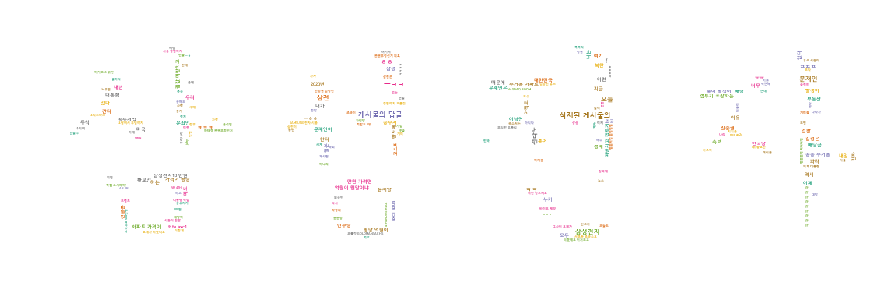

In [13]:
plt.figure(figsize = (15,8))
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HANDotumB.ttf', background_color="white", colormap = "Dark2_r", 
               max_words=2000, mask=mask, max_font_size=500, random_state=42)
               
wc.generate_from_text(contents)

plt.imshow(wc)
plt.axis("off")
plt.savefig('WC_삼성전자.png')

## (5) 인간지표 별 주가 그래프 그리기

In [14]:
df_test = df[['날짜', '인간지표']]
df_dummies = pd.get_dummies(df_test['인간지표'])
df_hodu = pd.concat([df_test['날짜'], df_dummies], axis = 1)
df_hodu = df_hodu.groupby('날짜').sum()

In [15]:
df_hodu.head()

,안티,중립,찬티
날짜,,,
2019.12.15,87.0,83.0,125.0
2019.12.16,166.0,121.0,245.0
2019.12.17,226.0,220.0,415.0
2019.12.18,153.0,175.0,353.0
2019.12.19,150.0,129.0,273.0


In [ ]:
def daily_stock_close(stock_code):
    
    daily_close = []
    date = []
    
    url = 'https://finance.naver.com/item/frgn.nhn?code=' + stock_code
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    for i in range(3,len(soup.select('table.type2')[1].select('tr'))) :
        
        try :
            daily_close.append(soup.select('table.type2')[1].select('tr')[i].select('td')[1].text.replace(',' , ''))
            date.append(soup.select('table.type2')[1].select('tr')[i].select('td')[0].text)
            
        except IndexError :
            continue
        
    return date, daily_close